In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.inception_v3 import InceptionV3
import cv2
import math
import os
from glob import glob
from scipy import stats as s
from sklearn.externals import joblib 

Using TensorFlow backend.
C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
base_model = InceptionV3(include_top=False, weights='imagenet')

In [3]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, None, None, 2 0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, None, None, 6 16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, None, None, 6 192         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, None, None, 6 192         conv2d_20[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, None, None, 6 192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, None, None, 9 288         conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, None, None, 6 192         conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, None, None, 6 0           batch_normalization_20[0][0]     
__________

batch_normalization_38 (BatchNo (None, None, None, 1 384         conv2d_38[0][0]                  
__________________________________________________________________________________________________
activation_33 (Activation)      (None, None, None, 1 0           batch_normalization_33[0][0]     
__________________________________________________________________________________________________
activation_38 (Activation)      (None, None, None, 1 0           batch_normalization_38[0][0]     
__________________________________________________________________________________________________
average_pooling2d_4 (AveragePoo (None, None, None, 7 0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, None, None, 1 147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_34 

__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, None, None, 1 576         conv2d_41[0][0]                  
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, None, None, 1 576         conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, None, None, 1 576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
batch_normalization_50 (BatchNo (None, None, None, 1 576         conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, None, None, 1 0           batch_normalization_41[0][0]     
__________

activation_60 (Activation)      (None, None, None, 1 0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, None, None, 7 0           activation_51[0][0]              
                                                                 activation_54[0][0]              
                                                                 activation_59[0][0]              
                                                                 activation_60[0][0]              
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, None, None, 1 147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, None, None, 1 576         conv2d_65[0][0]                  
__________

batch_normalization_74 (BatchNo (None, None, None, 1 576         conv2d_74[0][0]                  
__________________________________________________________________________________________________
activation_74 (Activation)      (None, None, None, 1 0           batch_normalization_74[0][0]     
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, None, None, 1 147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, None, None, 1 258048      activation_74[0][0]              
__________________________________________________________________________________________________
batch_normalization_71 (BatchNo (None, None, None, 1 576         conv2d_71[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_84 (Activation)      (None, None, None, 3 0           batch_normalization_84[0][0]     
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, None, None, 1 576         conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_77 (Activation)      (None, None, None, 3 0           batch_normalization_77[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, None, None, 7 0           activation_79[0][0]              
                                                                 activation_80[0][0]              
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, None, None, 7 0           activation_83[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_94[0][0]              
Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
__________________________________________________________________________________________________


In [4]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(51200,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(51, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [6]:
# loading the trained weights
model.load_weights("../Models/weightInceptionV3.hdf5")

In [7]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
location='../data/test'
classes=[]
videos=[]
test=pd.DataFrame()
for foldername in sorted(os.listdir(location)):
    classes.append(foldername)
    for files in sorted(os.listdir(location+'/'+foldername)):
        videos.append(foldername+'/'+files)
test['video_name']=videos
print(classes)
test_videos=test['video_name']
test.head()

['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kick_ball', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'punch', 'push', 'pushup', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


,video_name
0,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
1,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
2,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
3,brush_hair/Blonde_being_brushed_brush_hair_f_n...
4,brush_hair/Blonde_being_brushed_brush_hair_u_c...


In [9]:
# creating the tags
train = pd.read_csv('../data/train.csv')
y = train['class']
y = pd.get_dummies(y)

In [21]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    #print('../data/test/'+videoFile)
    print(videoFile.split('/')[0])

  0%|          | 0/1530 [00:00<?, ?it/s]

brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
brush_hair
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel


  3%|▎         | 41/1530 [00:00<00:03, 406.40it/s]

cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
cartwheel
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch


  5%|▌         | 79/1530 [00:00<00:03, 396.98it/s]

catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
catch
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew
chew


  8%|▊         | 120/1530 [00:00<00:03, 397.79it/s]

clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
clap
climb
climb
climb
climb
climb
climb
climb
climb


 10%|█         | 158/1530 [00:00<00:03, 392.12it/s]

climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs


 13%|█▎        | 205/1530 [00:00<00:03, 411.34it/s]

climb_stairs
climb_stairs
climb_stairs
climb_stairs
climb_stairs
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
dive
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword


 16%|█▋        | 252/1530 [00:00<00:03, 424.81it/s]

draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
draw_sword
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble
dribble


 20%|█▉        | 300/1530 [00:00<00:03, 342.47it/s]

drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
drink
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat


 22%|██▏       | 343/1530 [00:00<00:03, 363.96it/s]

eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
eat
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor


 25%|██▌       | 384/1530 [00:01<00:03, 375.25it/s]

fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fall_floor
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
fencing
flic_flac
flic_flac


 28%|██▊       | 422/1530 [00:01<00:03, 287.94it/s]

flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
flic_flac
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf


 30%|███       | 465/1530 [00:01<00:03, 319.06it/s]

golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
golf
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand
handstand


 33%|███▎      | 507/1530 [00:01<00:02, 341.25it/s]

handstand
handstand
handstand
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hug
hug
hug
hug
hug


 36%|███▌      | 545/1530 [00:01<00:03, 280.09it/s]

hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
hug
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump


 38%|███▊      | 589/1530 [00:01<00:03, 312.92it/s]

jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick
kick


 41%|████      | 629/1530 [00:01<00:02, 333.90it/s]

kick
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kick_ball
kiss
kiss
kiss
kiss
kiss
kiss
kiss


 44%|████▎     | 667/1530 [00:01<00:02, 345.85it/s]

kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
kiss
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh


 46%|████▌     | 704/1530 [00:02<00:03, 275.06it/s]

laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
laugh
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick
pick


 49%|████▊     | 743/1530 [00:02<00:02, 298.09it/s]

pick
pick
pick
pick
pick
pick
pick
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pour
pullup
pullup


 51%|█████     | 782/1530 [00:02<00:02, 319.34it/s]

pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
pullup
punch
punch
punch
punch
punch
punch
punch


 53%|█████▎    | 817/1530 [00:02<00:02, 261.20it/s]

punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
punch
push
push
push
push
push
push
push
push
push
push
push
push
push
push
push
push
push
push


 56%|█████▌    | 858/1530 [00:02<00:02, 291.30it/s]

push
push
push
push
push
push
push
push
push
push
push
push
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup


 58%|█████▊    | 892/1530 [00:02<00:02, 304.12it/s]

pushup
pushup
pushup
pushup
pushup
pushup
pushup
pushup
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike
ride_bike


 61%|██████    | 926/1530 [00:02<00:02, 267.20it/s]

ride_bike
ride_bike
ride_bike
ride_bike
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
ride_horse
run
run
run
run
run
run
run
run
run
run
run
run
run


 64%|██████▎   | 973/1530 [00:02<00:01, 303.50it/s]

run
run
run
run
run
run
run
run
run
run
run
run
run
run
run
run
run
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands


 66%|██████▋   | 1014/1530 [00:03<00:01, 328.28it/s]

shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shake_hands
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball
shoot_ball


 69%|██████▊   | 1050/1530 [00:03<00:01, 313.26it/s]

shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_bow
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun


 72%|███████▏  | 1098/1530 [00:03<00:01, 348.03it/s]

shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
shoot_gun
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
sit
situp
situp
situp
situp
situp
situp
situp
situp
situp


 75%|███████▌  | 1149/1530 [00:03<00:00, 383.26it/s]

situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
situp
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile
smile


 78%|███████▊  | 1191/1530 [00:03<00:00, 374.73it/s]

smile
smile
smile
smile
smile
smile
smile
smile
smile
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
smoke
somersault
somersault
somersault
somersault
somersault


 81%|████████  | 1235/1530 [00:03<00:00, 389.60it/s]

somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
somersault
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand


 83%|████████▎ | 1276/1530 [00:03<00:00, 384.82it/s]

stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
stand
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball
swing_baseball


 86%|████████▌ | 1316/1530 [00:03<00:00, 367.54it/s]

swing_baseball
swing_baseball
swing_baseball
swing_baseball
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword
sword_exercise
sword_exercise
sword_exercise
sword_exercise


 88%|████████▊ | 1354/1530 [00:03<00:00, 343.75it/s]

sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
sword_exercise
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk


 91%|█████████ | 1396/1530 [00:04<00:00, 361.46it/s]

talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
talk
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw
throw


 94%|█████████▎| 1434/1530 [00:04<00:00, 359.22it/s]

throw
throw
throw
throw
throw
throw
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
turn
walk
walk
walk


 96%|█████████▋| 1473/1530 [00:04<00:00, 367.32it/s]

walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
walk
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave


 99%|█████████▉| 1517/1530 [00:04<00:00, 384.94it/s]

wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave
wave


100%|██████████| 1530/1530 [00:04<00:00, 343.57it/s]


In [27]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    #print('../data/test/'+videoFile)
    cap = cv2.VideoCapture('../data/test/'+videoFile.split(' ')[0].split('/')[0]+'/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    # removing all other files from the temp folder
    files = glob('../data/temp/*')
    for f in files:
        os.remove(f)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames of this particular video in temp folder
#            print('../data/temp/' + "_frame%d.jpg" % count)
            filename ='../data/temp/' + "_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()
    
    # reading all the frames from temp folder
    images = glob("../data/temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)
        
    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 5*5*2048)
    # predicting tags for each array
    prediction = model.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    #print(y.columns.values[s.mode(prediction)[0][0]])
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    #print(videoFile.split('/')[0])
    actual.append(videoFile.split('/')[0])







  0%|          | 0/1530 [00:00<?, ?it/s]




  0%|          | 1/1530 [00:03<1:33:10,  3.66s/it]




  0%|          | 2/1530 [00:07<1:34:41,  3.72s/it]




  0%|          | 3/1530 [00:10<1:29:41,  3.52s/it]




  0%|          | 4/1530 [00:11<1:09:13,  2.72s/it]




  0%|          | 5/1530 [00:14<1:08:46,  2.71s/it]




  0%|          | 6/1530 [00:16<1:05:07,  2.56s/it]




  0%|          | 7/1530 [00:17<55:27,  2.18s/it]  




  1%|          | 8/1530 [00:20<1:01:07,  2.41s/it]




  1%|          | 9/1530 [00:23<1:07:00,  2.64s/it]




  1%|          | 10/1530 [00:25<57:38,  2.28s/it] 




  1%|          | 11/1530 [00:27<58:29,  2.31s/it]




  1%|          | 12/1530 [00:29<56:38,  2.24s/it]




  1%|          | 13/1530 [00:31<52:40,  2.08s/it]




  1%|          | 14/1530 [00:36<1:13:32,  2.91s/it]




  1%|          | 15/1530 [00:37<1:00:09,  2.38s/it]




  1%|          | 16/1530 [00:41<1:10:04,  2.78s/it]




  1%|          | 17/1530 [00:44<1:12:29,  2.87s/it]




  1%|         

 10%|▉         | 150/1530 [02:59<19:34,  1.17it/s]




 10%|▉         | 151/1530 [03:01<27:28,  1.20s/it]




 10%|▉         | 152/1530 [03:04<37:08,  1.62s/it]




 10%|█         | 153/1530 [03:07<46:09,  2.01s/it]




 10%|█         | 154/1530 [03:09<46:37,  2.03s/it]




 10%|█         | 155/1530 [03:14<1:12:34,  3.17s/it]




 10%|█         | 156/1530 [03:16<58:48,  2.57s/it]  




 10%|█         | 157/1530 [03:17<48:42,  2.13s/it]




 10%|█         | 158/1530 [03:18<43:31,  1.90s/it]




 10%|█         | 159/1530 [03:19<37:58,  1.66s/it]




 10%|█         | 160/1530 [03:20<30:50,  1.35s/it]




 11%|█         | 161/1530 [03:21<27:40,  1.21s/it]




 11%|█         | 162/1530 [03:22<25:14,  1.11s/it]




 11%|█         | 163/1530 [03:22<21:37,  1.05it/s]




 11%|█         | 164/1530 [03:23<20:36,  1.10it/s]




 11%|█         | 165/1530 [03:24<24:15,  1.07s/it]




 11%|█         | 166/1530 [03:26<30:27,  1.34s/it]




 11%|█         | 167/1530 [03:29<38:09,  1.68s/it]




 11%|█

 19%|█▉        | 298/1530 [05:34<36:52,  1.80s/it]




 20%|█▉        | 299/1530 [05:37<45:01,  2.19s/it]




 20%|█▉        | 300/1530 [05:38<38:06,  1.86s/it]




 20%|█▉        | 301/1530 [05:39<33:57,  1.66s/it]




 20%|█▉        | 302/1530 [05:40<30:54,  1.51s/it]




 20%|█▉        | 303/1530 [05:41<25:05,  1.23s/it]




 20%|█▉        | 304/1530 [05:42<22:35,  1.11s/it]




 20%|█▉        | 305/1530 [05:43<22:43,  1.11s/it]




 20%|██        | 306/1530 [05:44<21:03,  1.03s/it]




 20%|██        | 307/1530 [05:45<21:39,  1.06s/it]




 20%|██        | 308/1530 [05:46<21:17,  1.05s/it]




 20%|██        | 309/1530 [05:47<20:05,  1.01it/s]




 20%|██        | 310/1530 [05:47<18:58,  1.07it/s]




 20%|██        | 311/1530 [05:48<18:26,  1.10it/s]




 20%|██        | 312/1530 [05:49<19:42,  1.03it/s]




 20%|██        | 313/1530 [05:50<19:00,  1.07it/s]




 21%|██        | 314/1530 [05:52<21:49,  1.08s/it]




 21%|██        | 315/1530 [05:53<20:37,  1.02s/it]




 21%|██   

 29%|██▉       | 447/1530 [07:40<13:59,  1.29it/s]




 29%|██▉       | 448/1530 [07:40<14:08,  1.27it/s]




 29%|██▉       | 449/1530 [07:41<12:48,  1.41it/s]




 29%|██▉       | 450/1530 [07:42<13:26,  1.34it/s]




 29%|██▉       | 451/1530 [07:43<13:34,  1.33it/s]




 30%|██▉       | 452/1530 [07:43<14:08,  1.27it/s]




 30%|██▉       | 453/1530 [07:44<14:20,  1.25it/s]




 30%|██▉       | 454/1530 [07:45<14:39,  1.22it/s]




 30%|██▉       | 455/1530 [07:46<14:49,  1.21it/s]




 30%|██▉       | 456/1530 [07:47<15:01,  1.19it/s]




 30%|██▉       | 457/1530 [07:48<15:07,  1.18it/s]




 30%|██▉       | 458/1530 [07:49<15:05,  1.18it/s]




 30%|███       | 459/1530 [07:49<15:11,  1.17it/s]




 30%|███       | 460/1530 [07:50<15:15,  1.17it/s]




 30%|███       | 461/1530 [07:51<15:19,  1.16it/s]




 30%|███       | 462/1530 [07:52<15:20,  1.16it/s]




 30%|███       | 463/1530 [07:53<15:18,  1.16it/s]




 30%|███       | 464/1530 [07:54<15:02,  1.18it/s]




 30%|███  

 39%|███▉      | 596/1530 [09:28<10:26,  1.49it/s]




 39%|███▉      | 597/1530 [09:28<08:48,  1.77it/s]




 39%|███▉      | 598/1530 [09:29<09:01,  1.72it/s]




 39%|███▉      | 599/1530 [09:29<09:11,  1.69it/s]




 39%|███▉      | 600/1530 [09:30<08:51,  1.75it/s]




 39%|███▉      | 601/1530 [09:31<10:48,  1.43it/s]




 39%|███▉      | 602/1530 [09:31<10:06,  1.53it/s]




 39%|███▉      | 603/1530 [09:32<10:27,  1.48it/s]




 39%|███▉      | 604/1530 [09:33<10:09,  1.52it/s]




 40%|███▉      | 605/1530 [09:33<10:02,  1.53it/s]




 40%|███▉      | 606/1530 [09:34<10:00,  1.54it/s]




 40%|███▉      | 607/1530 [09:34<08:34,  1.79it/s]




 40%|███▉      | 608/1530 [09:35<08:56,  1.72it/s]




 40%|███▉      | 609/1530 [09:36<09:07,  1.68it/s]




 40%|███▉      | 610/1530 [09:36<09:04,  1.69it/s]




 40%|███▉      | 611/1530 [09:37<09:07,  1.68it/s]




 40%|████      | 612/1530 [09:37<09:07,  1.68it/s]




 40%|████      | 613/1530 [09:38<09:13,  1.66it/s]




 40%|████ 

 49%|████▊     | 745/1530 [12:11<13:10,  1.01s/it]




 49%|████▉     | 746/1530 [12:12<12:12,  1.07it/s]




 49%|████▉     | 747/1530 [12:13<11:45,  1.11it/s]




 49%|████▉     | 748/1530 [12:14<12:22,  1.05it/s]




 49%|████▉     | 749/1530 [12:14<12:01,  1.08it/s]




 49%|████▉     | 750/1530 [12:15<11:49,  1.10it/s]




 49%|████▉     | 751/1530 [12:16<11:34,  1.12it/s]




 49%|████▉     | 752/1530 [12:17<12:13,  1.06it/s]




 49%|████▉     | 753/1530 [12:18<11:44,  1.10it/s]




 49%|████▉     | 754/1530 [12:19<11:22,  1.14it/s]




 49%|████▉     | 755/1530 [12:20<13:33,  1.05s/it]




 49%|████▉     | 756/1530 [12:22<14:39,  1.14s/it]




 49%|████▉     | 757/1530 [12:23<15:11,  1.18s/it]




 50%|████▉     | 758/1530 [12:24<14:06,  1.10s/it]




 50%|████▉     | 759/1530 [12:27<21:16,  1.66s/it]




 50%|████▉     | 760/1530 [12:29<21:19,  1.66s/it]




 50%|████▉     | 761/1530 [12:30<19:59,  1.56s/it]




 50%|████▉     | 762/1530 [12:31<17:08,  1.34s/it]




 50%|████▉

 58%|█████▊    | 894/1530 [14:36<09:22,  1.13it/s]




 58%|█████▊    | 895/1530 [14:36<09:20,  1.13it/s]




 59%|█████▊    | 896/1530 [14:37<09:10,  1.15it/s]




 59%|█████▊    | 897/1530 [14:38<09:06,  1.16it/s]




 59%|█████▊    | 898/1530 [14:39<08:57,  1.18it/s]




 59%|█████▉    | 899/1530 [14:40<08:56,  1.18it/s]




 59%|█████▉    | 900/1530 [14:41<08:59,  1.17it/s]




 59%|█████▉    | 901/1530 [14:42<09:41,  1.08it/s]




 59%|█████▉    | 902/1530 [14:44<14:10,  1.35s/it]




 59%|█████▉    | 903/1530 [14:46<15:09,  1.45s/it]




 59%|█████▉    | 904/1530 [14:47<14:55,  1.43s/it]




 59%|█████▉    | 905/1530 [14:49<15:22,  1.48s/it]




 59%|█████▉    | 906/1530 [14:50<13:29,  1.30s/it]




 59%|█████▉    | 907/1530 [14:51<12:15,  1.18s/it]




 59%|█████▉    | 908/1530 [14:52<12:19,  1.19s/it]




 59%|█████▉    | 909/1530 [14:53<13:08,  1.27s/it]




 59%|█████▉    | 910/1530 [14:54<11:57,  1.16s/it]




 60%|█████▉    | 911/1530 [14:55<11:13,  1.09s/it]




 60%|█████

 68%|██████▊   | 1042/1530 [17:13<08:37,  1.06s/it]




 68%|██████▊   | 1043/1530 [17:14<08:02,  1.01it/s]




 68%|██████▊   | 1044/1530 [17:14<07:30,  1.08it/s]




 68%|██████▊   | 1045/1530 [17:15<07:04,  1.14it/s]




 68%|██████▊   | 1046/1530 [17:16<06:49,  1.18it/s]




 68%|██████▊   | 1047/1530 [17:16<06:06,  1.32it/s]




 68%|██████▊   | 1048/1530 [17:17<06:16,  1.28it/s]




 69%|██████▊   | 1049/1530 [17:18<06:54,  1.16it/s]




 69%|██████▊   | 1050/1530 [17:19<06:42,  1.19it/s]




 69%|██████▊   | 1051/1530 [17:21<09:54,  1.24s/it]




 69%|██████▉   | 1052/1530 [17:24<13:26,  1.69s/it]




 69%|██████▉   | 1053/1530 [17:27<16:02,  2.02s/it]




 69%|██████▉   | 1054/1530 [17:27<12:34,  1.58s/it]




 69%|██████▉   | 1055/1530 [17:28<10:05,  1.27s/it]




 69%|██████▉   | 1056/1530 [17:28<07:57,  1.01s/it]




 69%|██████▉   | 1057/1530 [17:29<06:48,  1.16it/s]




 69%|██████▉   | 1058/1530 [17:32<11:40,  1.48s/it]




 69%|██████▉   | 1059/1530 [17:35<16:26,  2.10s/

 78%|███████▊  | 1188/1530 [20:07<04:45,  1.20it/s]




 78%|███████▊  | 1189/1530 [20:08<04:43,  1.20it/s]




 78%|███████▊  | 1190/1530 [20:08<04:45,  1.19it/s]




 78%|███████▊  | 1191/1530 [20:09<04:42,  1.20it/s]




 78%|███████▊  | 1192/1530 [20:10<04:43,  1.19it/s]




 78%|███████▊  | 1193/1530 [20:11<04:42,  1.19it/s]




 78%|███████▊  | 1194/1530 [20:12<04:31,  1.24it/s]




 78%|███████▊  | 1195/1530 [20:12<04:27,  1.25it/s]




 78%|███████▊  | 1196/1530 [20:13<04:29,  1.24it/s]




 78%|███████▊  | 1197/1530 [20:14<04:29,  1.24it/s]




 78%|███████▊  | 1198/1530 [20:15<04:32,  1.22it/s]




 78%|███████▊  | 1199/1530 [20:16<04:58,  1.11it/s]




 78%|███████▊  | 1200/1530 [20:17<05:33,  1.01s/it]




 78%|███████▊  | 1201/1530 [20:19<06:53,  1.26s/it]




 79%|███████▊  | 1202/1530 [20:21<07:29,  1.37s/it]




 79%|███████▊  | 1203/1530 [20:22<07:48,  1.43s/it]




 79%|███████▊  | 1204/1530 [20:23<06:24,  1.18s/it]




 79%|███████▉  | 1205/1530 [20:24<06:18,  1.17s/

 87%|████████▋ | 1334/1530 [22:35<02:35,  1.26it/s]




 87%|████████▋ | 1335/1530 [22:35<02:22,  1.37it/s]




 87%|████████▋ | 1336/1530 [22:36<02:14,  1.45it/s]




 87%|████████▋ | 1337/1530 [22:37<02:24,  1.33it/s]




 87%|████████▋ | 1338/1530 [22:38<02:30,  1.28it/s]




 88%|████████▊ | 1339/1530 [22:39<02:35,  1.23it/s]




 88%|████████▊ | 1340/1530 [22:39<02:35,  1.22it/s]




 88%|████████▊ | 1341/1530 [22:40<02:38,  1.20it/s]




 88%|████████▊ | 1342/1530 [22:41<02:40,  1.17it/s]




 88%|████████▊ | 1343/1530 [22:42<02:52,  1.09it/s]




 88%|████████▊ | 1344/1530 [22:43<02:35,  1.20it/s]




 88%|████████▊ | 1345/1530 [22:44<02:49,  1.09it/s]




 88%|████████▊ | 1346/1530 [22:45<02:59,  1.02it/s]




 88%|████████▊ | 1347/1530 [22:46<03:02,  1.00it/s]




 88%|████████▊ | 1348/1530 [22:47<03:04,  1.01s/it]




 88%|████████▊ | 1349/1530 [22:48<02:56,  1.03it/s]




 88%|████████▊ | 1350/1530 [22:51<04:57,  1.65s/it]




 88%|████████▊ | 1351/1530 [22:52<04:11,  1.40s/

 97%|█████████▋| 1480/1530 [25:12<00:53,  1.08s/it]




 97%|█████████▋| 1481/1530 [25:12<00:49,  1.01s/it]




 97%|█████████▋| 1482/1530 [25:13<00:47,  1.02it/s]




 97%|█████████▋| 1483/1530 [25:14<00:43,  1.07it/s]




 97%|█████████▋| 1484/1530 [25:15<00:38,  1.21it/s]




 97%|█████████▋| 1485/1530 [25:17<00:51,  1.14s/it]




 97%|█████████▋| 1486/1530 [25:17<00:43,  1.02it/s]




 97%|█████████▋| 1487/1530 [25:18<00:37,  1.14it/s]




 97%|█████████▋| 1488/1530 [25:19<00:39,  1.07it/s]




 97%|█████████▋| 1489/1530 [25:20<00:38,  1.08it/s]




 97%|█████████▋| 1490/1530 [25:20<00:32,  1.21it/s]




 97%|█████████▋| 1491/1530 [25:21<00:32,  1.20it/s]




 98%|█████████▊| 1492/1530 [25:22<00:32,  1.18it/s]




 98%|█████████▊| 1493/1530 [25:24<00:37,  1.00s/it]




 98%|█████████▊| 1494/1530 [25:24<00:31,  1.13it/s]




 98%|█████████▊| 1495/1530 [25:25<00:27,  1.26it/s]




 98%|█████████▊| 1496/1530 [25:26<00:33,  1.03it/s]




 98%|█████████▊| 1497/1530 [25:28<00:38,  1.18s/

In [28]:
# Save the model as a pickle in a file 
joblib.dump(predict, '../Pickle/InceptionV3_predict.pkl') 
joblib.dump(actual, '../Pickle/InceptionV3_actual.pkl')

['../Pickle/InceptionV3_actual.pkl']

In [29]:
# Load the model from the file 
history = joblib.load('../Pickle/InceptionV3_predict.pkl') 
history = joblib.load('../Pickle/InceptionV3_actual.pkl') 

In [30]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

31.83006535947712

In [31]:
from sklearn import metrics
print(metrics.classification_report(actual,predict))

C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

    brush_hair       0.22      0.47      0.29        30
     cartwheel       0.00      0.00      0.00        30
         catch       0.33      0.27      0.30        30
          chew       0.21      0.70      0.32        30
          clap       0.28      0.23      0.25        30
         climb       0.30      0.80      0.44        30
  climb_stairs       0.45      0.30      0.36        30
          dive       0.19      0.17      0.18        30
    draw_sword       0.29      0.50      0.37        30
       dribble       0.50      0.83      0.62        30
         drink       0.10      0.60      0.17        30
           eat       0.06      0.03      0.04        30
    fall_floor       0.00      0.00      0.00        30
       fencing       0.00      0.00      0.00        30
     flic_flac       0.22      0.13      0.17        30
          golf       0.24      0.70      0.36        30
     handstand       0.14      0.20      0.17  

In [32]:
cm=metrics.confusion_matrix(actual,predict)
print(cm)

[[14  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 3  0  0 ...  0  0  2]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  1]]


Text(0.5, 1, 'Accuracy score: 31.83006535947712')

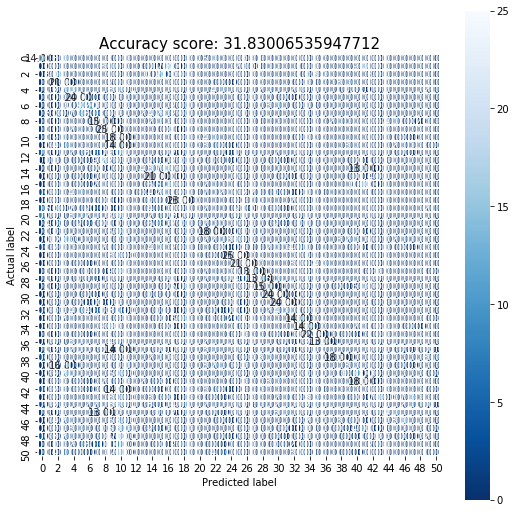

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(metrics.accuracy_score(predict, actual)*100)
plt.title(all_sample_title,size=15)